Read a plot a variable from the northeast pacific raw hindcast.

In [3]:
import xarray as xr
import cf_xarray # This is a wrapper for xarray that allows access to the data through standard coordinate names
import fsspec
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [4]:
fs = fsspec.filesystem(
    "reference", 
    fo='gcs://noaa-oar-cefi-regional-mom6/northeast_pacific/full_domain/hindcast/daily/raw/r20241015/tos.nep.full.hcast.daily.raw.r20241015.199301-201912.json',
    remote_protocol="gcs", 
    remote_options={"anon":True},
    skip_instance_cache=True,
    target_options={"anon": True}
)
m = fs.get_mapper()
tos = xr.open_dataset(m, engine='zarr', consolidated=False)
tos

<xarray.Dataset> Size: 11GB
Dimensions:     (time: 9861, nv: 2, yh: 816, xh: 342)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) datetime64[ns] 79kB 1993-01-01T12:00:00 ... 2019-12-31...
  * xh          (xh) float64 3kB 229.1 229.2 229.3 229.3 ... 254.8 254.9 255.0
  * yh          (yh) float64 7kB 13.86 13.93 14.0 14.07 ... 59.51 59.52 59.52
Data variables:
    average_DT  (time) timedelta64[ns] 79kB ...
    average_T1  (time) datetime64[ns] 79kB ...
    average_T2  (time) datetime64[ns] 79kB ...
    time_bnds   (time, nv) datetime64[ns] 158kB ...
    tos         (time, yh, xh) float32 11GB ...
Attributes: (12/27)
    NumFilesInSet:          1
    associated_files:       areacello: 19930101.ocean_static.nc
    cefi_archive_version:   /archive/e1n/fre/cefi/NEP/2024_08/NEP10k_082024_c...
    cefi_aux:               N/A
    cefi_data_doi:          10.5281/zenodo.13936240
    cefi_date_range:        199301-201912
    ...                     ...
    cefi_subdomain:         full
    cefi_variable:          tos
    external_variables:     areacello
    grid_tile:              N/A
    grid_type:              regular
    title:                  NEP10k_082024_clean_spinup

In [5]:
fsg = fsspec.filesystem(
    "reference", 
    fo='gcs://noaa-oar-cefi-regional-mom6/northeast_pacific/full_domain/hindcast/daily/raw/r20241015/ocean_static.json',
    remote_protocol="gcs", 
    remote_options={"anon":True},
    skip_instance_cache=True,
    target_options={"anon": True}
)
m = fsg.get_mapper()
grid = xr.open_dataset(m, engine='zarr', consolidated=False)
grid

<xarray.Dataset> Size: 28MB
Dimensions:       (yq: 817, xq: 343, yh: 816, xh: 342)
Coordinates:
  * xh            (xh) float64 3kB 229.1 229.2 229.3 229.3 ... 254.8 254.9 255.0
  * xq            (xq) float64 3kB 229.1 229.2 229.3 229.3 ... 254.8 254.9 255.0
  * yh            (yh) float64 7kB 13.86 13.93 14.0 14.07 ... 59.51 59.52 59.52
  * yq            (yq) float64 7kB 13.83 13.9 13.96 14.03 ... 59.51 59.52 59.53
Data variables: (12/25)
    Coriolis      (yq, xq) float32 1MB ...
    areacello     (yh, xh) float32 1MB ...
    areacello_bu  (yq, xq) float32 1MB ...
    areacello_cu  (yh, xq) float32 1MB ...
    areacello_cv  (yq, xh) float32 1MB ...
    deptho        (yh, xh) float32 1MB ...
    ...            ...
    geolon_v      (yq, xh) float32 1MB ...
    sftof         (yh, xh) float32 1MB ...
    wet           (yh, xh) float32 1MB ...
    wet_c         (yq, xq) float32 1MB ...
    wet_u         (yh, xq) float32 1MB ...
    wet_v         (yq, xh) float32 1MB ...
Attributes:
    external_variables:  areacello areacello

In [9]:
slice_tos = tos.sel(time="2003-06-01T12:00:00", nv=1)
slice_tos.cf

Coordinates:
             CF Axes: * X: ['xh']
                      * Y: ['yh']
                        T: ['time']
                        Z: n/a

      CF Coordinates: * longitude: ['xh']
                      * latitude: ['yh']
                        time: ['time']
                        vertical: n/a

       Cell Measures:   area, volume: n/a

      Standard Names:   n/a

              Bounds:   n/a

       Grid Mappings:   n/a

Data Variables:
       Cell Measures:   area, volume: n/a

      Standard Names:   sea_surface_temperature: ['tos']

              Bounds:   T: ['time_bnds']
                        time: ['time_bnds']

       Grid Mappings:   n/a

In [13]:
xmin = grid['geolon'].min()
xmax = grid['geolon'].max()
ymin = grid['geolat'].min()
ymax = grid['geolat'].max()
aspect = (xmax-xmin)/(ymax-ymin)

In [14]:
slice_tos

<xarray.Dataset> Size: 1MB
Dimensions:     (yh: 816, xh: 342)
Coordinates:
    nv          float64 8B 1.0
    time        datetime64[ns] 8B 2003-06-01T12:00:00
  * xh          (xh) float64 3kB 229.1 229.2 229.3 229.3 ... 254.8 254.9 255.0
  * yh          (yh) float64 7kB 13.86 13.93 14.0 14.07 ... 59.51 59.52 59.52
Data variables:
    average_DT  timedelta64[ns] 8B ...
    average_T1  datetime64[ns] 8B ...
    average_T2  datetime64[ns] 8B ...
    time_bnds   datetime64[ns] 8B ...
    tos         (yh, xh) float32 1MB 27.7 27.69 27.64 ... -1.704 -1.701 -1.713
Attributes: (12/27)
    NumFilesInSet:          1
    associated_files:       areacello: 19930101.ocean_static.nc
    cefi_archive_version:   /archive/e1n/fre/cefi/NEP/2024_08/NEP10k_082024_c...
    cefi_aux:               N/A
    cefi_data_doi:          10.5281/zenodo.13936240
    cefi_date_range:        199301-201912
    ...                     ...
    cefi_subdomain:         full
    cefi_variable:          tos
    external_variables:     areacello
    grid_tile:              N/A
    grid_type:              regular
    title:                  NEP10k_082024_clean_spinup

In [44]:
slice_tos['tos'].attrs

{'cell_measures': 'area: areacello',
 'cell_methods': 'area:mean yh:mean xh:mean time: mean',
 'long_name': 'Sea Surface Temperature',
 'standard_name': 'sea_surface_temperature',
 'time_avg_info': 'average_T1,average_T2,average_DT',
 'units': 'degC'}

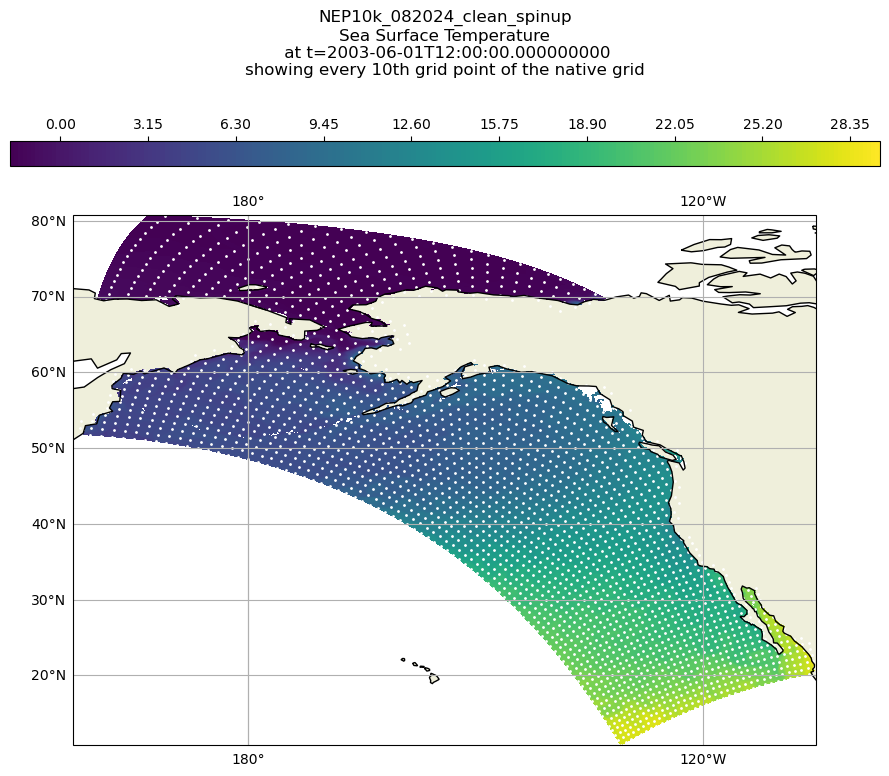

In [45]:
plt.figure(figsize=(8*aspect,8))
proj = ccrs.PlateCarree(central_longitude=-180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([xmin, xmax, ymin, ymax], crs=proj180)
# add some features to make the map a little more polished
ax.add_feature(cartopy.feature.LAND)
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
ct = ax.contourf(grid['geolon'], grid['geolat'], slice_tos['tos'], levels=255, transform=proj180, cmap="viridis")
scatter = ax.scatter(grid['geolon'][::10,::10], grid['geolat'][::10,::10], s=1, transform=proj180, color='white')
plt.colorbar(ct, orientation='horizontal',pad=0.08, aspect=35, fraction=.06, location='top')
plt.title(str(slice_tos.attrs['title']) + '\n'+slice_tos['tos'].attrs['long_name']+'\n at t=' + str(slice_tos['time'].values) +'\nshowing every 10th grid point of the native grid', y=1.25)
plt.savefig('my_plot.jpg', dpi=300, bbox_inches='tight')